## Binary Tree Implementation

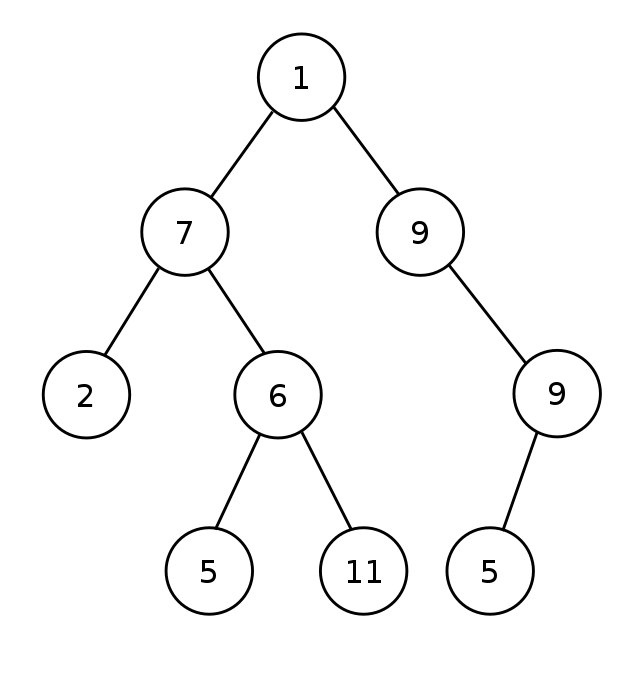

In [198]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.right = None
        self.left = None
        self.distance = 0

In [199]:
tree_tuple = ((2, 7, (5, 6, 11)), 1, (None, 9, (5, 9, None)))
type(tree_tuple)

tuple

In [200]:
def convert_tuple_to_tree(tree_tuple):
    if tree_tuple is not None and type(tree_tuple) == tuple:
        node = TreeNode(tree_tuple[1])
        node.left = convert_tuple_to_tree(tree_tuple[0])
        node.right = convert_tuple_to_tree(tree_tuple[2])
    elif tree_tuple is None:
        node = None
    else:
        node = TreeNode(tree_tuple)
    return node

In [201]:
root_node = convert_tuple_to_tree(tree_tuple)

In [202]:
print_inorder(root_node)

2 => 7 => 5 => 6 => 11 => 1 => 9 => 5 => 9 => 

## Inorder Traversal

In [203]:
## LRN
def print_inorder(node):
    if node.left is not None:
        print_inorder(node.left)
    print(node.key, end=" => ")
    if node.right is not None:
        print_inorder(node.right)

In [204]:
print_inorder(root_node)

2 => 7 => 5 => 6 => 11 => 1 => 9 => 5 => 9 => 

## Preorder Traversal

In [205]:
## RLN
def print_preorder(node):
    print(node.key, end=" => ")
    if node.left is not None:
        print_preorder(node.left)
    if node.right is not None:
        print_preorder(node.right)

In [206]:
print_preorder(root_node)

1 => 7 => 2 => 6 => 5 => 11 => 9 => 9 => 5 => 

## Post order Traversal

In [207]:
## LRN
def print_postorder(node):
    if node.right is not None:
        print_postorder(node.right)
    if node.left is not None:
        print_postorder(node.left)
    print(node.key, end=" => ")

In [208]:
print_postorder(root_node)

5 => 9 => 9 => 11 => 5 => 6 => 2 => 7 => 1 => 

## Top view of binary tree

In [209]:
def print_top_view(node):
    if node.left is not None:
        print_top_view(node.left)
    print(node.key)

## Calculate height / depth of a binary tree

In [210]:
def calculate_height(node):
    if node is None:
        return 0
    else:
        return 1 + max(calculate_height(node.left), calculate_height(node.right))

In [211]:
calculate_height(root_node)

4

## Calculate the nodes in binary tree

In [212]:
def calculate_nodes(node):
    if node is None:
        return 0
    else:
        return 1 + calculate_nodes(node.left) + calculate_nodes(node.right)

In [213]:
calculate_nodes(root_node)

9

## Calculate leaf nodes

In [214]:
def calculate_leaf_nodes(node):
    if node is None:
        return 0
    elif node.left is None and node.right is None:
        print(node.key, end=" => ")
        return 1
    else:
        return calculate_leaf_nodes(node.left) + calculate_leaf_nodes(node.right)

In [215]:
calculate_leaf_nodes(root_node)

2 => 5 => 11 => 5 => 

4

## Level Order Traversal

In [216]:
from collections import deque
def print_level_order(node):
    if node is not None:
        level_order_queue = deque()
        level_order_queue.append(node)
        while (len(level_order_queue) > 0):
            count = len(level_order_queue)
            while count > 0:
                current_node = level_order_queue.popleft()
                print(current_node.key, end=" , ")
                if current_node.left is not None:
                    level_order_queue.append(current_node.left)
                if current_node.right is not None:
                    level_order_queue.append(current_node.right)
                count -= 1
            print()

In [217]:
print_level_order(root_node)

1 , 
7 , 9 , 
2 , 6 , 9 , 
5 , 11 , 5 , 


## Horizontal Distance

In [227]:
def horizontal_distance(node):
    if node is not None:
        from collections import deque
        hd_dict = {}
        insert_queue = deque()
        insert_queue.append(node)
        node.distance = 0
        while len(insert_queue):
            count = len(insert_queue)
            while count > 0:
                current_node = insert_queue.popleft()
                current_distance_list = hd_dict.get(current_node.distance, [])
                current_distance_list.extend([current_node.key])
                hd_dict[current_node.distance] = current_distance_list
                if current_node.left is not None:
                    current_node.left.distance = current_node.distance - 1
                    insert_queue.append(current_node.left)
                if current_node.right is not None:
                    current_node.right.distance = current_node.distance + 1
                    insert_queue.append(current_node.right)
                count -= 1
        return hd_dict

In [228]:
horizontal_distance_dict = horizontal_distance(one_node)

## Top view

In [235]:
for key in sorted(horizontal_distance_dict):
    print(horizontal_distance_dict[key][0], end=" => ")

2 => 7 => 1 => 9 => 9 => 

In [236]:
## TODO: Maximum depth, minimum depth, diameter of binary tree